<h1 align=center> Cinemática Inversa <h1>

In [1]:
import numpy as np
import sympy as sp

sp.init_printing()

<h3 align=center> Definição da Pose desejada: <h3>

In [2]:
x = 200
y = 300
z = 400
e = 45
r = 30

<h3 align=center> Matriz de Transformação Homogênea Target: <h3>

200 300 400 56.309932474020215 45 30


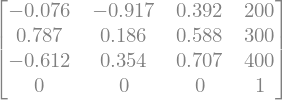

In [3]:
#Ângulo estrurado da orientação (5 GDL's):
a = np.degrees(np.arctan2(y, x))
print(x, y, z, a, e, r)
#Elementos da matriz de rotação:
r11 = ((np.cos(np.radians(a))*np.cos(np.radians(e))*np.cos(np.radians(r)))-(np.sin(np.radians(a))*np.sin(np.radians(r))))
r12 = (-(np.cos(np.radians(a))*np.cos(np.radians(e))*np.sin(np.radians(r)))-(np.sin(np.radians(a))*np.cos(np.radians(r))))
r13 = (np.cos(np.radians(a))*np.sin(np.radians(e)))
r21 = ((np.sin(np.radians(a))*np.cos(np.radians(e))*np.cos(np.radians(r)))+(np.cos(np.radians(a))*np.sin(np.radians(r))))
r22 = (-(np.sin(np.radians(a))*np.cos(np.radians(e))*np.sin(np.radians(r)))+(np.cos(np.radians(a))*np.cos(np.radians(r))))
r23 = (np.sin(np.radians(a))*np.sin(np.radians(e)))
r31 = (-np.sin(np.radians(e))*np.cos(np.radians(r)))
r32 = (np.sin(np.radians(e))*np.sin(np.radians(r)))
r33 = np.cos(np.radians(e))

#Função para arredondar os números:
def arredNUM(matrix, n=3):
    for a in sp.preorder_traversal(matrix):
        if isinstance(a, sp.Float):
            matrix = matrix.subs(a, round(a, n))
    return matrix


#COnstrução da matriz homogênea para o alvo:
Ht = sp.Matrix([
    [r11, r12, r13, x],
    [r21, r22, r23, y],
    [r31, r32, r33, z],
    [0, 0, 0, 1]
])

arredNUM(Ht)

<h3 align=center> Desacoplamento Cinemático: <h3>

In [4]:
xc = (x-(139*r13))
yc = (y-(139*r23))
zc = (z-(139*r33))

xc, yc, zc

<h3 align=center> Solução da Cinemática Inversa: <h3>

In [5]:
#Vetor para armazenar as soluções:
sol = np.empty((4, 5))

#Theta 1:
#Front:
th = np.degrees(np.arctan2(yc, xc))
sol[0][0] = th
sol[1][0] = th
#Back:
if(th>0):
    sol[2][0] = th-180
    sol[3][0] = th-180
else:
    sol[2][0] = th+180
    sol[3][0] = th+180

#Theta 3:
r = np.sqrt((xc**2)+(yc**2))
h = np.sqrt((r**2)+((zc-187)**2))
c3 = (((h**2)/(2*(230**2)))-1)
s3 = np.sqrt(1-(c3**2))
#Front Elbow Up:
sol[0][2] = np.degrees(np.arctan2(-s3, c3))
#Front Elbow Down:
sol[1][2] = np.degrees(np.arctan2(s3, c3))
#Back Elbow Up:
sol[2][2] = np.degrees(np.arctan2(s3, c3))
#Back Elbow Down:
sol[3][2] = np.degrees(np.arctan2(-s3, c3))

#Theta 2:
beta = np.degrees(np.arctan2((zc-187), r))
for i in range(len(sol)):
    if(i<2):
        alpha = np.degrees(np.arctan2((-230*np.sin(np.radians(sol[i][2]))), (230*(1+np.cos(np.radians(sol[i][2]))))))
        sol[i][1] = (alpha+beta-90)
    else:
        alpha = np.degrees(np.arctan2((230*np.sin(np.radians(sol[i][2]))), (230*(1+np.cos(np.radians(sol[i][2]))))))
        sol[i][1] = (90-alpha-beta)
    

#Theta 4:
for i in range(len(sol)):
    s4 = (-(r13*np.cos(np.radians(sol[i][0]))*np.cos(np.radians(sol[i][1]+sol[i][2])))-(r23*np.sin(np.radians(sol[i][0]))*np.cos(np.radians(sol[i][1]+sol[i][2])))-(r33*np.sin(np.radians(sol[i][1]+sol[i][2]))))
    c4 = (-(r13*np.cos(np.radians(sol[i][0]))*np.sin(np.radians(sol[i][1]+sol[i][2])))-(r23*np.sin(np.radians(sol[i][0]))*np.sin(np.radians(sol[i][1]+sol[i][2])))+(r33*np.cos(np.radians(sol[i][1]+sol[i][2]))))
    sol[i][3] = np.degrees(np.arctan2(s4, c4))

#Theta 5:
for i in range(len(sol)):
    s5 = (-(r11*np.sin(np.radians(sol[i][0])))+(r21*np.cos(np.radians(sol[i][0]))))
    c5 = (-(r12*np.sin(np.radians(sol[i][0])))+(r22*np.cos(np.radians(sol[i][0]))))
    sol[i][4] = np.degrees(np.arctan2(s5, c5))

for s in sol:
    print(s.round(4))

[  56.3099  -14.8602 -103.0318   72.892    30.    ]
[  56.3099 -117.892   103.0318  -30.1398   30.    ]
[-123.6901   14.8602  103.0318  -72.892  -150.    ]
[-123.6901  117.892  -103.0318   30.1398 -150.    ]
